# San Francisco Thefts
## Weekend nights in Downtown are when you're most likely to get your stuff taken

In [1]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

In [2]:
data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

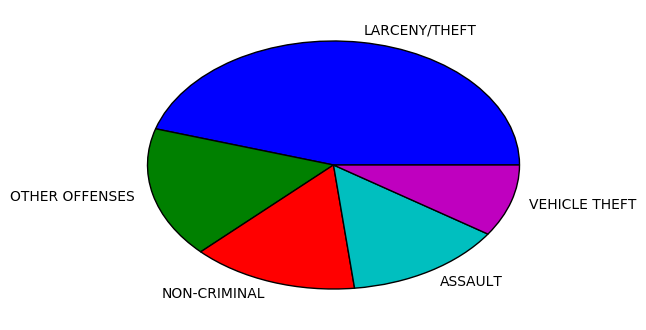

In [3]:
data.groupby(['Category']).agg('count')['IncidntNum'].rename('').sort_values(ascending=False)[0:5].plot(kind='pie')

The 5 most common crime categories are shown below. These include "Other Offenses" and "Non-Criminal", so we will take the three most common criminal activities for further investigation.

In [4]:
relevant_categories = ['LARCENY/THEFT', 'VEHICLE THEFT', 'ASSAULT']
thefts_assaults = data[data['Category'].isin(relevant_categories)]

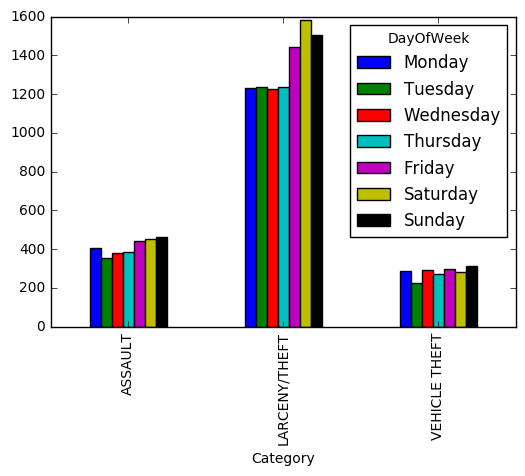

In [5]:
ta_day = thefts_assaults.groupby(['DayNo', 'Category', 'DayOfWeek']) \
    .agg('count')['IncidntNum'].reset_index() \
    .pivot(index='Category', columns='DayOfWeek', values='IncidntNum')
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ta_day = ta_day[days_of_week]
ta_day.plot(kind='bar')

As we can see, vehicle theft remains fairly constant over the whole week, assaults trend up at weekends, and larcenies / thefts are significantly more likely on Friday, Saturday & Sunday. 

So - taking larcenies / thefts, do we see any patterns over time?

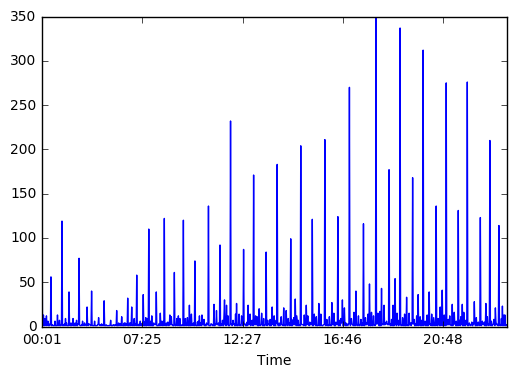

In [6]:
thefts = thefts_assaults[thefts_assaults['Category'] == 'LARCENY/THEFT']
thefts_time = thefts.groupby('Time').agg('count').reset_index()[['Time', 'IncidntNum']]
thefts_time.plot(x='Time', y='IncidntNum', legend=False)

There appears to be a relationship here, but the spikes in the reported times are likely to be due to quirks in the reporting frameworks, or to be "short-hand" times used to represent approximations. Let's pop all the data into bands to even out those quirks and see what that shows us.

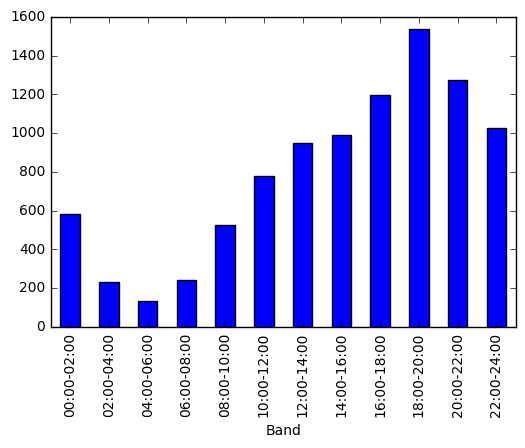

In [7]:
thefts_time['Band'] = thefts_time['Time'].apply(lambda x: '{:02d}:00-{:02d}:00' \
        .format(int(x[:2]) - (int(x[:2]) % 2), int(x[:2]) - (int(x[:2]) % 2) + 2))
thefts_time.groupby('Band').agg('sum').reset_index()[['Band', 'IncidntNum']].plot(kind='bar', x='Band', y='IncidntNum', legend=False)

# thefts_time[['IncidntNum', 'Band']].plot(x='Band', y='IncidntNum', kind='bar')

These figures show an almost perfect standard distribution over a mean of 19:00 - weekend evenings seem to be the time you'll get stuff stolen. Maybe this is because this is when people are heading out for the evening and are unlikely to be back for a while?

So we know when, but where do larcenies and thefts happen?

In [8]:
import geopandas as gp
from shapely.geometry import Point
import matplotlib.pyplot as plt

C:\Users\adam\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


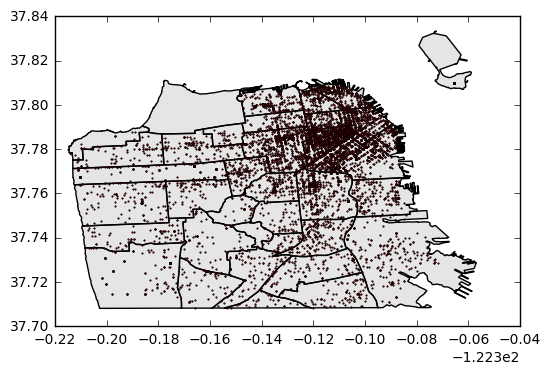

In [10]:
# load shapefile for San Francisco Neighborhoods
sanfran = gp.GeoDataFrame.from_file('./planning_neighborhoods/neighborhoods_gps.shp')

#sanfran.crs = {'init': 'epsg:4326'}

#sanfran

# set up the data
thefts['geometry'] = thefts.apply(lambda row: Point(row['X'], row['Y']), axis=1)

locations = gp.GeoDataFrame(thefts, geometry = 'geometry')

fig, ax = plt.subplots(1)
sanfran.plot(ax=ax, color='#cccccc')
locations['geometry'].plot(ax=ax, markersize=1, color="#cc0000")

plt.show()



The above map shows the incidents of theft are clustered around downtown and its surroundings, which is unsurprising. These are the most populous and well-off areas of the city. 

This analysis shows that if you go out on weekend evenings, and you live around downtown, it's probably worth investing in some serious home security kit!